## ASSIGNMENT 4 Data Preprocessing and feature engineering  for Ramen(Food) ratings

In [64]:
#importing all important packages
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [65]:
data = pd.read_csv('ramen-ratings.csv') #reading the data and save it into a variable
data.head(10) #show the first 10 rows of the data

,Review #,Brand,Variety,Style,Country,Stars,Top_Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.5,NaN


In [66]:
#checking total rows and column in our data
data.shape

(2580, 7)

Alright, we know that we got 7 columns in our data. Which are:
1. *Review* : unique numbers that inform the review order from the latest
2. *Brand*  : Ramen brand
3. *Variety*: variation of ramen
4. *Style*  : style of ramen
5. *Country*: Where the ramen is available
6. *Stars*  : Ramen ratings
7. *Top Ten*: ramen achievement

## Data Cleaning
 - check For missing data
 - check For outliers


In [67]:
data.isna().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top_Ten     2539
dtype: int64

#### We see that in the *Style* column we have 2 missing data. And *Top Ten* data tells us that if the ramen doesn't get 'Top Ten' achievement, then the data will be blank. Since we only have 2 missing data, we can drop it.

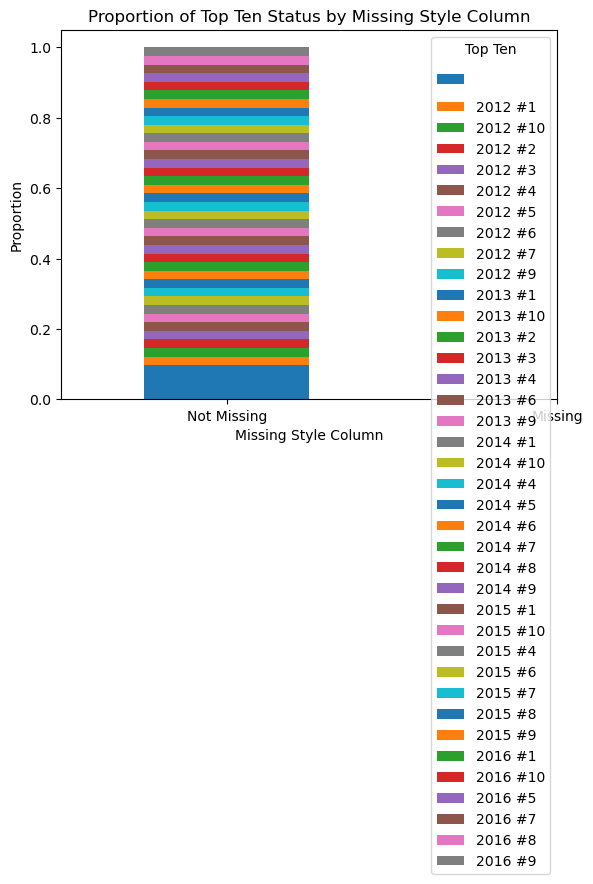

In [68]:
# Create a binary feature indicating missingness in the 'Style' column
data['Style_Missing'] = data['Style'].isna().astype(int)

# Calculate the proportion of 'Top Ten' status within each group
relationship = data.groupby('Style_Missing')['Top_Ten'].value_counts(normalize=True).unstack()

# Plot the relationship
relationship.plot(kind='bar', stacked=True)
plt.xlabel('Missing Style Column')
plt.ylabel('Proportion')
plt.title('Proportion of Top Ten Status by Missing Style Column')
plt.legend(title='Top Ten')
plt.xticks([0, 1], ['Not Missing', 'Missing'], rotation=0)
plt.show()

In [69]:
data = data.dropna(subset=['Style'])
print(data["Style"].isna().sum())

0


In [70]:
data['Stars'] = pd.to_numeric(data['Stars'], errors='coerce')
data = data.dropna(subset=['Stars'])

# Analyzing Categorical Variabels in data set 

Brand
Nissin                             381
Nongshim                            98
Maruchan                            76
Mama                                71
Paldo                               66
Myojo                               63
Indomie                             53
Samyang Foods                       51
Ottogi                              45
Vina Acecook                        34
Lucky Me!                           34
Vifon                               33
Maggi                               30
Mamee                               29
Master Kong                         28
MAMA                                27
A-Sha Dry Noodle                    26
Wai Wai                             25
KOKA                                25
Sapporo Ichiban                     25
MyKuali                             24
Ve Wong                             24
JML                                 23
Samyang                             19
Koka                                18
Batchelors         

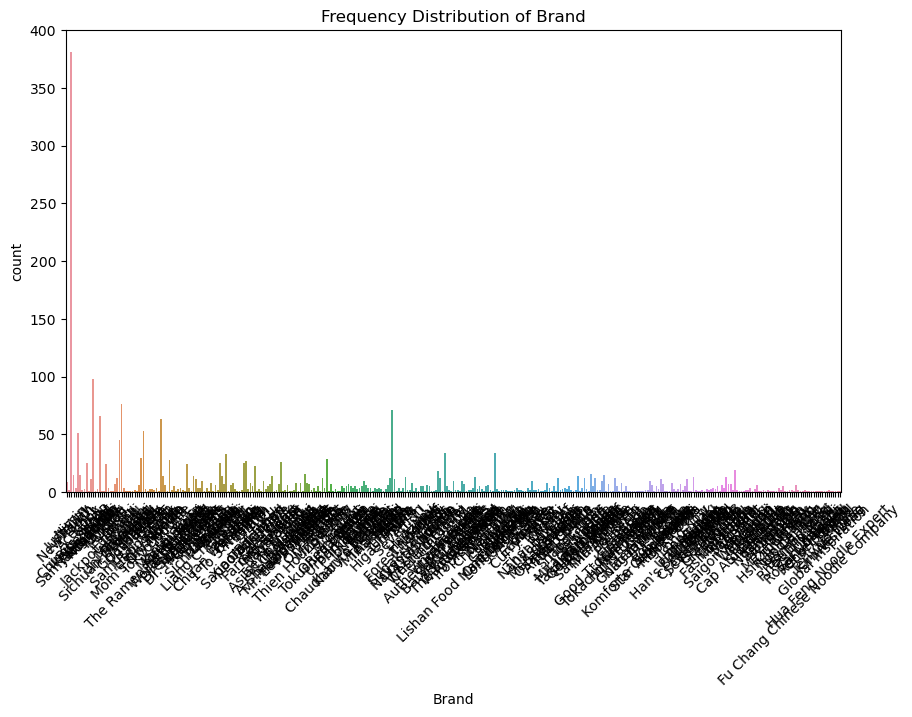

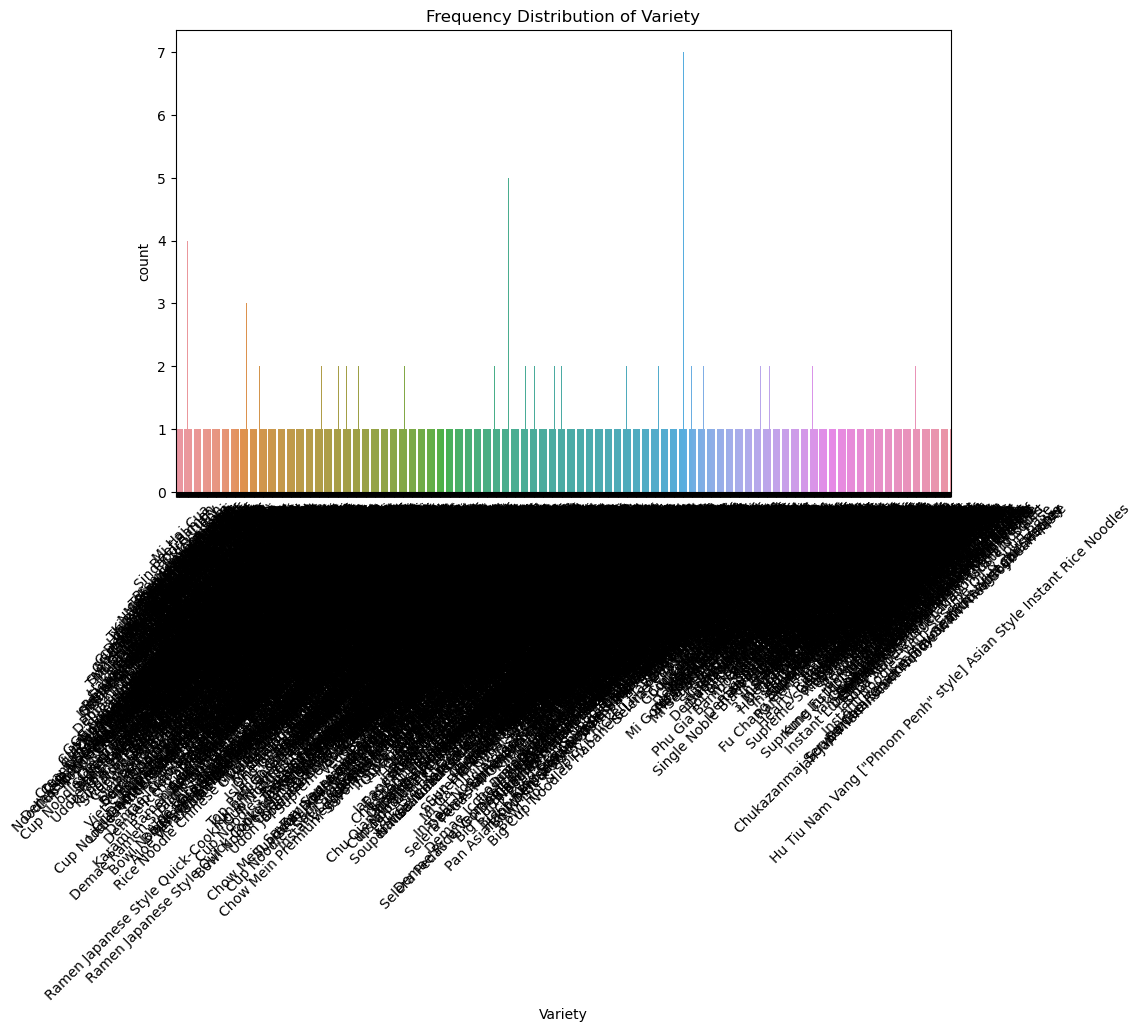

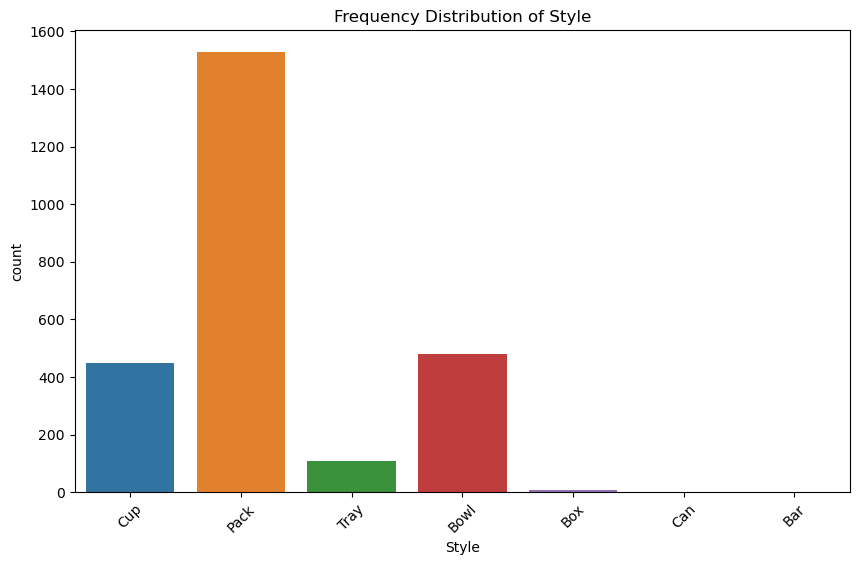

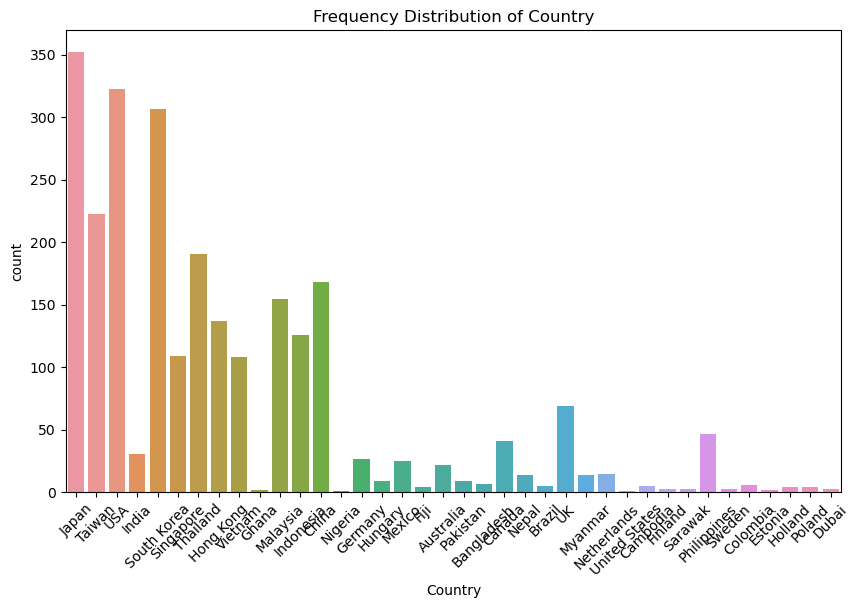

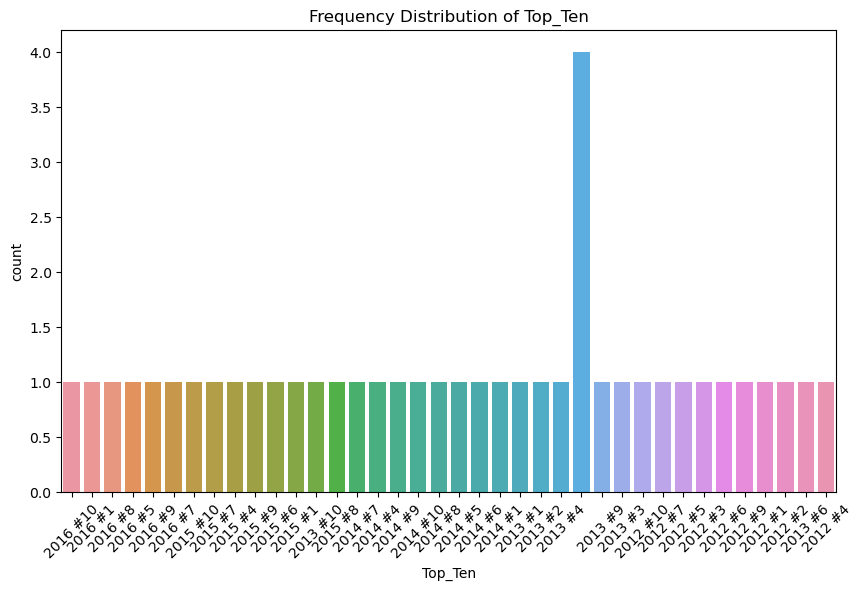

In [71]:
# Analyzing Categorical Variables
# 1. Frequency Distribution
categorical_variables = ['Brand', 'Variety', 'Style', 'Country', 'Top_Ten']
for var in categorical_variables:
    print(data[var].value_counts())

# 2. Bar Plot
for var in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=var)
    plt.title(f'Frequency Distribution of {var}')
    plt.xticks(rotation=45)
    plt.show()

# Analyzing Numerical Variabels in data set

         Stars
count 2575.000
mean     3.655
std      1.016
min      0.000
25%      3.250
50%      3.750
75%      4.250
max      5.000


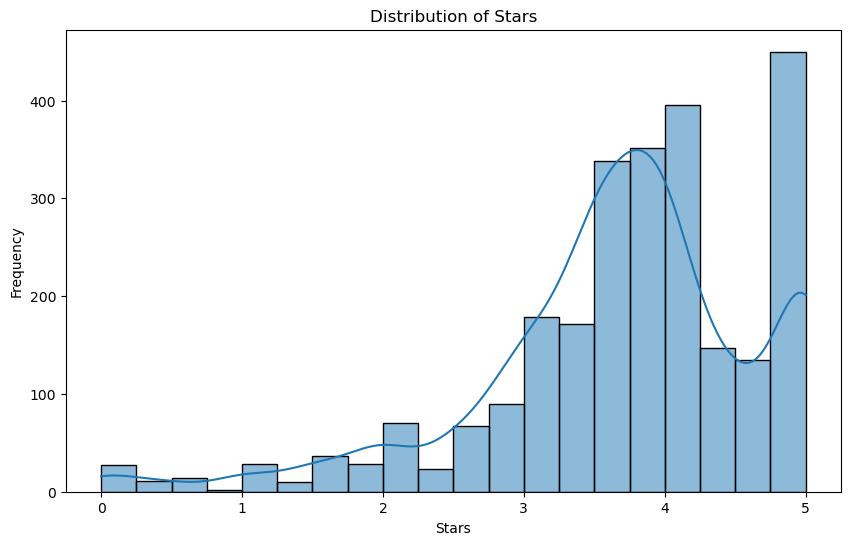

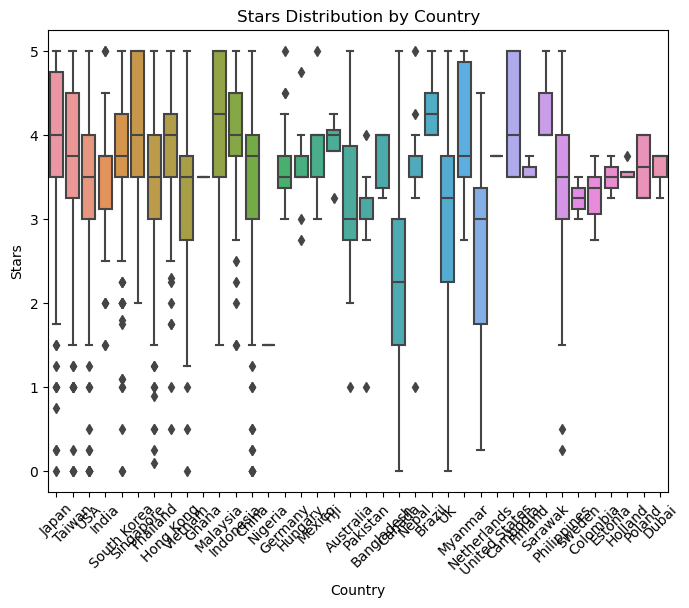

In [72]:
# Analyzing Numerical Variables
# 1. Descriptive Statistics
numerical_variables = ['Stars']
print(data[numerical_variables].describe())

# 2. Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Stars', bins=20, kde=True)
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

# 3. Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Country', y='Stars')
plt.title('Stars Distribution by Country')
plt.xticks(rotation=45)
plt.show()

## Frequency
Let's see all styles in *Style* column

In [73]:
data['Style'].unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar'], dtype=object)

Ok, now we use *value_counts()* to count each unique Ramen Style.

In [74]:
data['Style'].value_counts()

Style
Pack    1528
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: count, dtype: int64

Pack Style is the most used style. Now let's see all countries in *Country* column.

In [75]:
print(data["Country"].unique())
print(len(data["Country"].unique()), 'Countries')

['Japan' 'Taiwan' 'USA' 'India' 'South Korea' 'Singapore' 'Thailand'
 'Hong Kong' 'Vietnam' 'Ghana' 'Malaysia' 'Indonesia' 'China' 'Nigeria'
 'Germany' 'Hungary' 'Mexico' 'Fiji' 'Australia' 'Pakistan' 'Bangladesh'
 'Canada' 'Nepal' 'Brazil' 'UK' 'Myanmar' 'Netherlands' 'United States'
 'Cambodia' 'Finland' 'Sarawak' 'Philippines' 'Sweden' 'Colombia'
 'Estonia' 'Holland' 'Poland' 'Dubai']
38 Countries


And again, we use *value_counts()*

In [76]:
data['Country'].value_counts()

Country
Japan            352
USA              323
South Korea      307
Taiwan           223
Thailand         191
China            168
Malaysia         155
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: count, dtype: int64

Since Ramen is very popular in Japan, there is no doubt Japan will be the top one.

## The Top 10
Let's see all top 10 ramen for each year.

In [77]:
top10 = data.dropna()
top10

,Review #,Brand,Variety,Style,Country,Stars,Top_Ten,Style_Missing
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.000,2016 #10,0
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.000,2016 #1,0
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.000,2016 #8,0
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5.000,2016 #5,0
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5.000,2016 #9,0
891,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5.000,2016 #7,0
942,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5.000,2015 #10,0
963,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5.000,2015 #7,0
995,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5.000,2015 #4,0
1059,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5.000,2015 #9,0


In [78]:
top10 = top10[top10['Top_Ten'] != '\n'] 
top10 = top10.sort_values('Top_Ten' ) 
top10

,Review #,Brand,Variety,Style,Country,Stars,Top_Ten,Style_Missing
2475,105,Indomie,Special Fried Curly Noodle,Pack,Indonesia,5.000,2012 #1,0
1972,608,Koka,Spicy Black Pepper,Pack,Singapore,5.000,2012 #10,0
2533,47,Indomie,Mi Goreng Jumbo Barbecue Chicken,Pack,Indonesia,5.000,2012 #2,0
2188,392,Nissin,Yakisoba Noodles Karashi,Tray,Japan,5.000,2012 #3,0
2567,13,Sapporo Ichiban,Chow Mein,Pack,Japan,5.000,2012 #4,0
2146,434,Mi Sedaap,Kari Spesial,Pack,Indonesia,4.500,2012 #5,0
2189,391,Myojo,Hyoubanya No Chukasoba Oriental,Pack,Japan,4.250,2012 #6,0
2002,578,Nongshim,Shin Ramyun Black,Pack,South Korea,4.750,2012 #7,0
2295,285,Doll,Artificial Chicken,Pack,Hong Kong,4.500,2012 #9,0
1588,992,Prima Taste,Singapore Laksa La Mian,Pack,Singapore,5.000,2013 #1,0


# Feature Engineering

## Detecting outlier


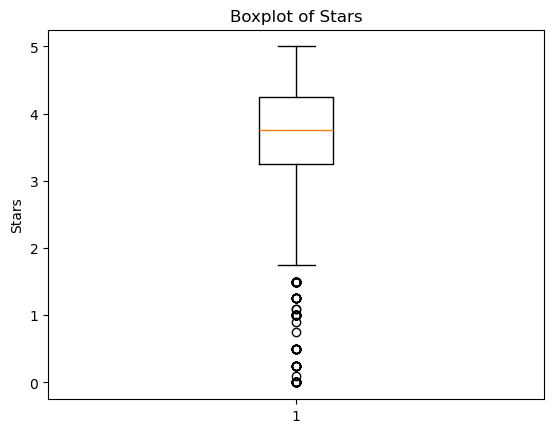

In [79]:
# Detecting outlier data in the Stars column using the boxplot method
fig, ax = plt.subplots()
ax.boxplot(data['Stars'])
ax.set_ylabel('Stars')
plt.title('Boxplot of Stars')
plt.show()



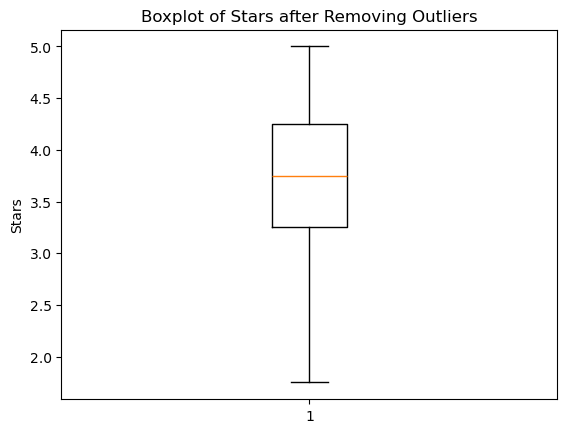

count   2446.000
mean       3.804
std        0.792
min        1.750
25%        3.250
50%        3.750
75%        4.250
max        5.000
Name: Stars, dtype: float64


In [80]:
q1 = data['Stars'].quantile(0.25)
q3 = data['Stars'].quantile(0.75)
iqr = q3 - q1
outlier_threshold_up = q3 + 1.5 * iqr
outlier_threshold_down = q1 - 1.5 * iqr

data = data[(data['Stars'] <= outlier_threshold_up) & (data['Stars'] >= outlier_threshold_down)]


fig, ax = plt.subplots()
ax.boxplot(data['Stars'])
ax.set_ylabel('Stars')
plt.title('Boxplot of Stars after Removing Outliers')
plt.show()


print(data['Stars'].describe())

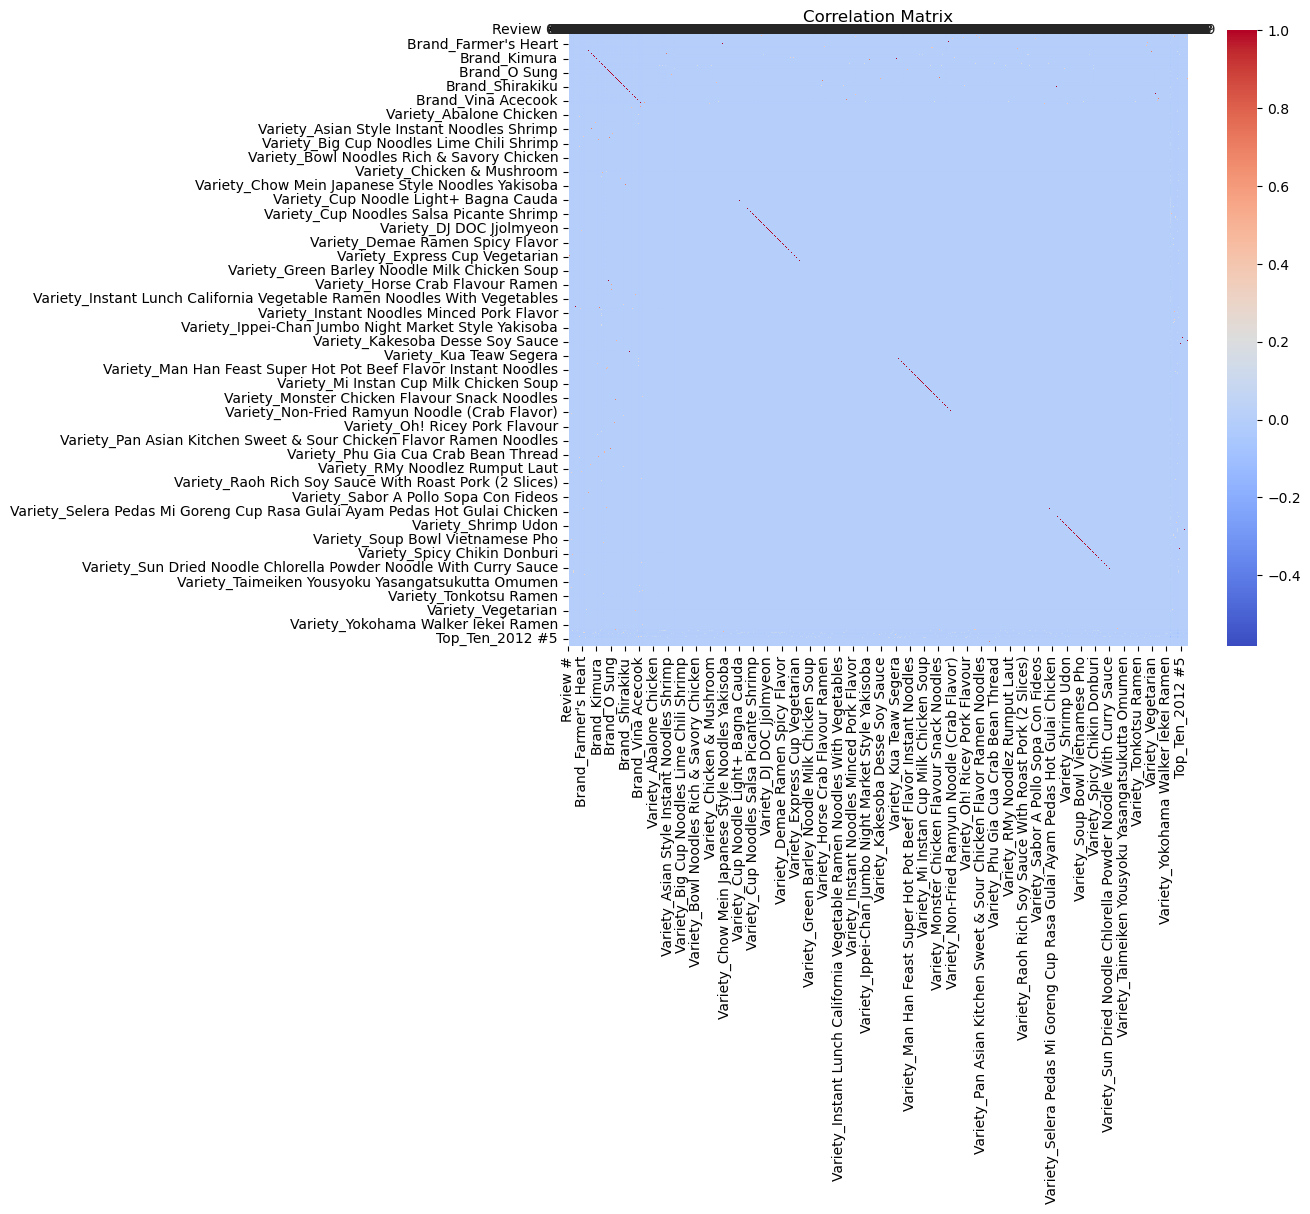

In [81]:
# Convert categorical variables to numerical form using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Brand', 'Variety', 'Style', 'Country', 'Top_Ten'], drop_first=True)

# Calculate the correlation matrix
corr_matrix = data_encoded.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Creating New features


In [82]:
data['Is_TopTen'] = data['Top_Ten'].notna().astype(int)
data['Length_of_Brand'] = data['Brand'].apply(len)
data['Length_of_Variety'] = data['Variety'].apply(len)

In [83]:
popular_styles = ['Pack', 'Cup']
data['Is_Style_Popular'] = data['Style'].isin(popular_styles).astype(int)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2446 entries, 0 to 2578
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Review #           2446 non-null   int64  
 1   Brand              2446 non-null   object 
 2   Variety            2446 non-null   object 
 3   Style              2446 non-null   object 
 4   Country            2446 non-null   object 
 5   Stars              2446 non-null   float64
 6   Top_Ten            41 non-null     object 
 7   Style_Missing      2446 non-null   int32  
 8   Is_TopTen          2446 non-null   int32  
 9   Length_of_Brand    2446 non-null   int64  
 10  Length_of_Variety  2446 non-null   int64  
 11  Is_Style_Popular   2446 non-null   int32  
dtypes: float64(1), int32(3), int64(3), object(5)
memory usage: 219.8+ KB


### Create a simple unit test to check if the number of columns in the preprocessed dataset matches the expected value

In [85]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample data for demonstration purposes
data = pd.DataFrame({
    'Survived': [1, 0, 1, 0, 1],
    'Pclass': [3, 1, 3, 2, 1],
    'Age': [22, 38, 26, 35, 28],
    'Fare': [7.25, 71.2833, 7.925, 53.1, 8.05],
    'SibSp': [1, 1, 0, 1, 0],
    'Parch': [0, 0, 0, 0, 0],
    'Embarked': ['S', 'C', 'S', 'S', 'S'],
    'Sex': ['male', 'female', 'female', 'female', 'male']
})

def preprocess_data(data):
    # Feature Engineering
    data['FamilySize'] = data['SibSp'] + data['Parch']
    data = data.drop(columns=['SibSp', 'Parch'])

    # Handle missing values (if any)
    data['Age'] = data['Age'].fillna(data['Age'].median())
    data['Fare'] = data['Fare'].fillna(data['Fare'].median())

    # Handle categorical variables
    data = pd.get_dummies(data, columns=['Embarked', 'Sex'], drop_first=True)
    
    # Scaling numerical features
    scaler = StandardScaler()
    data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])
    
    return data

preprocessed_data = preprocess_data(data)
print("Preprocessed Data Columns:", preprocessed_data.columns.tolist())

def test_preprocessed_data_columns(preprocessed_data):
    expected_columns = ['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'Embarked_S', 'Sex_male']
    print("Expected Columns:", expected_columns)
    print("Actual Columns:", preprocessed_data.columns.tolist())
    assert len(preprocessed_data.columns) == len(expected_columns), f"Expected {len(expected_columns)} columns, but got {len(preprocessed_data.columns)}"
    assert set(preprocessed_data.columns) == set(expected_columns), f"Expected columns {expected_columns}, but got {list(preprocessed_data.columns)}"
    return "All tests passed."

print(test_preprocessed_data_columns(preprocessed_data))


Preprocessed Data Columns: ['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'Embarked_S', 'Sex_male']
Expected Columns: ['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'Embarked_S', 'Sex_male']
Actual Columns: ['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'Embarked_S', 'Sex_male']
All tests passed.
